Análisis del Dataset: TITANIC

Equipo: Héctor Olmos, Hoda Norouszi

10 de Julio del 2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilos
#plt.style.use('seaborn-whitegrid')
sns.set_theme(style="whitegrid")
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
%matplotlib inline

# Cargar datos
ruta = r"H:\ironhack\Data_Scientist\ironhack_ejercicios\Data_Scientist\Exercises\114_TITANIC\titanic.csv"
df = pd.read_csv(ruta)

# Renombrar columnas para mayor claridad
df = df.rename(columns={
    'Siblings/Spouses Aboard': 'SibSp',
    'Parents/Children Aboard': 'Parch'
})

# Preprocesamiento
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

# Extraer títulos
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
df['Title'] = df['Title'].apply(lambda x: x if x in common_titles else 'Otros')

# Grupos de edad
age_bins = [0, 12, 18, 30, 50, 100]
age_labels = ['Niño (<12)', 'Adolescente (12-17)', 'Joven (18-29)', 'Adulto (30-49)', 'Mayor (50+)']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Grupos de tarifas
fare_bins = [0, 10, 25, 50, 100, 600]
fare_labels = ['Muy Baja (<10)', 'Baja (10-24)', 'Media (25-49)', 'Alta (50-99)', 'Muy Alta (100+)']
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)

print("Dataset cargado y preprocesado. Total de registros:", len(df))

Dataset cargado y preprocesado. Total de registros: 887


Análisis Demográfico y de Supervivencia

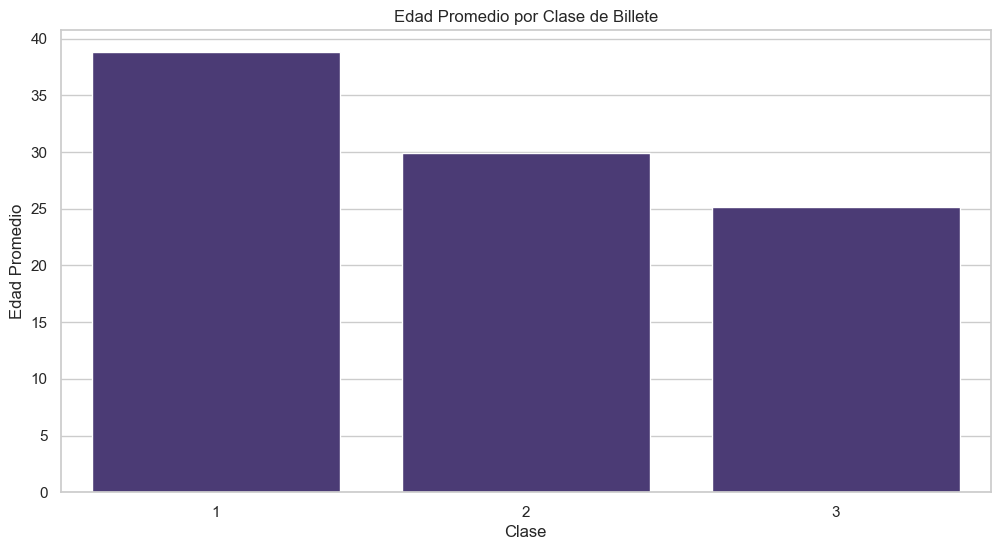

Edad promedio por clase:
Pclass
1    38.788981
2    29.868641
3    25.188747
Name: Age, dtype: float64


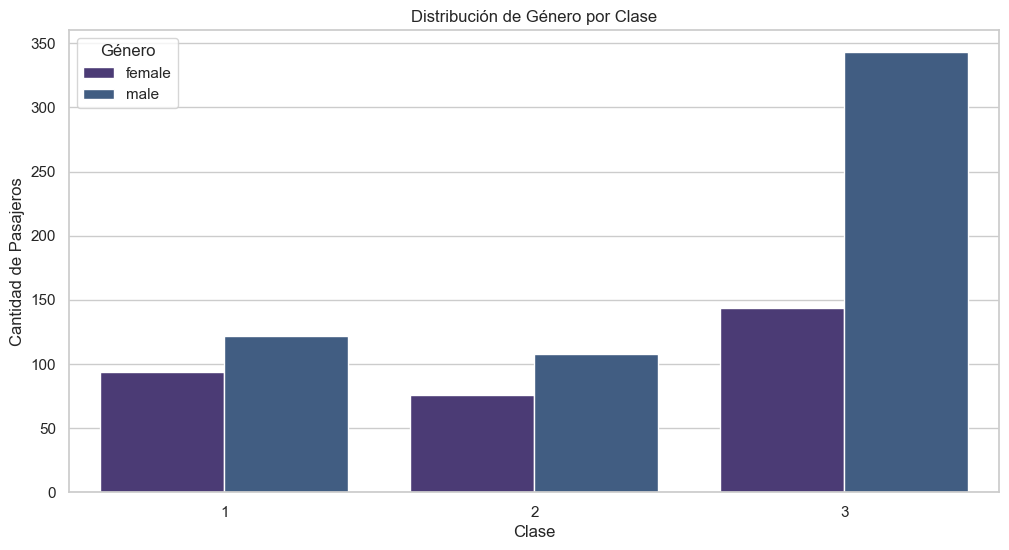

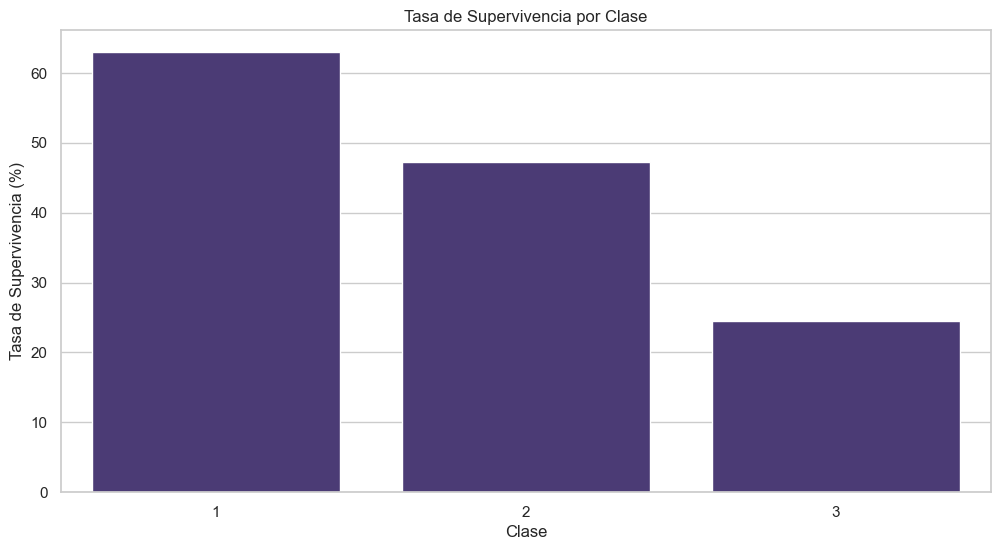


Tasa de supervivencia por clase (%):
Pclass
1    62.962963
2    47.282609
3    24.435318
Name: Survived, dtype: float64


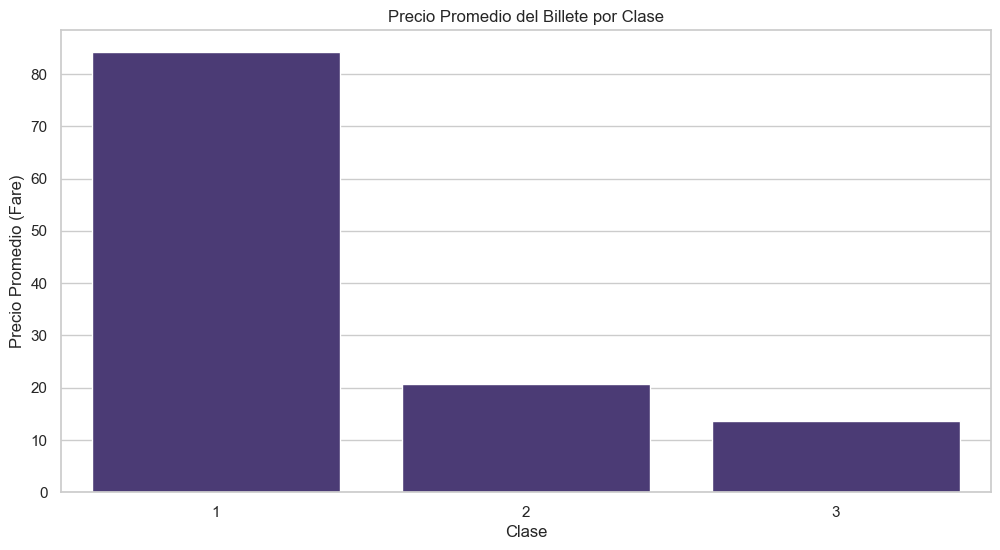


Precio promedio por clase:
Pclass
1    84.154687
2    20.662183
3    13.707707
Name: Fare, dtype: float64

Clase con más familias grandes (FamilySize > 3): Clase 3

Edad promedio general: 29.5 años
Edad promedio por sexo:
Sex
female    27.719745
male      30.431361
Name: Age, dtype: float64

Edad más frecuente general: 22.0

Tasa de supervivencia niños <10 años: 57.7%

Edad con más fallecidos: 21.0 años


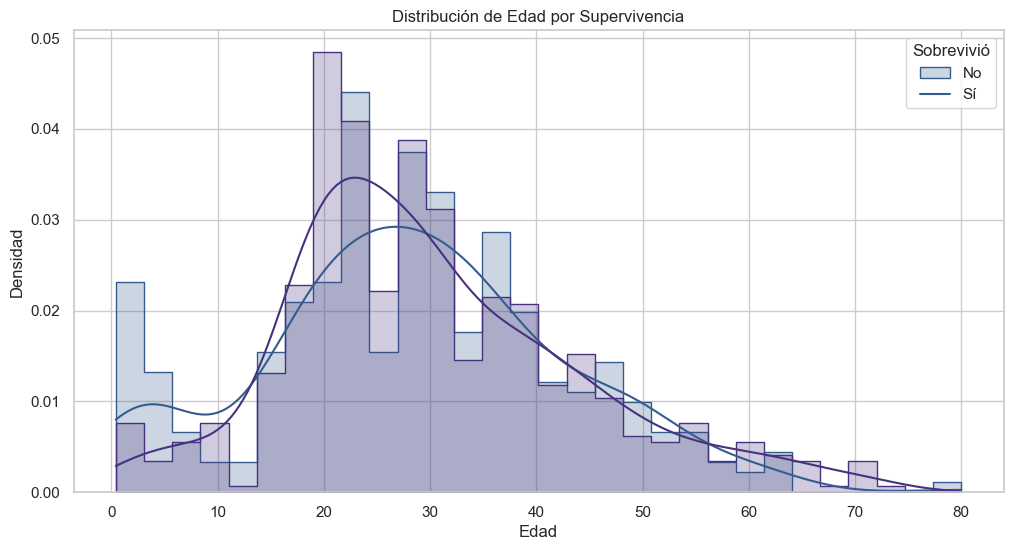


Personas solas: 533 (60.1%)
Personas acompañadas: 354 (39.9%)

Tamaño familiar más común: 0 miembros
Supervivencia solos: 30.6%
Supervivencia con familia: 50.6%


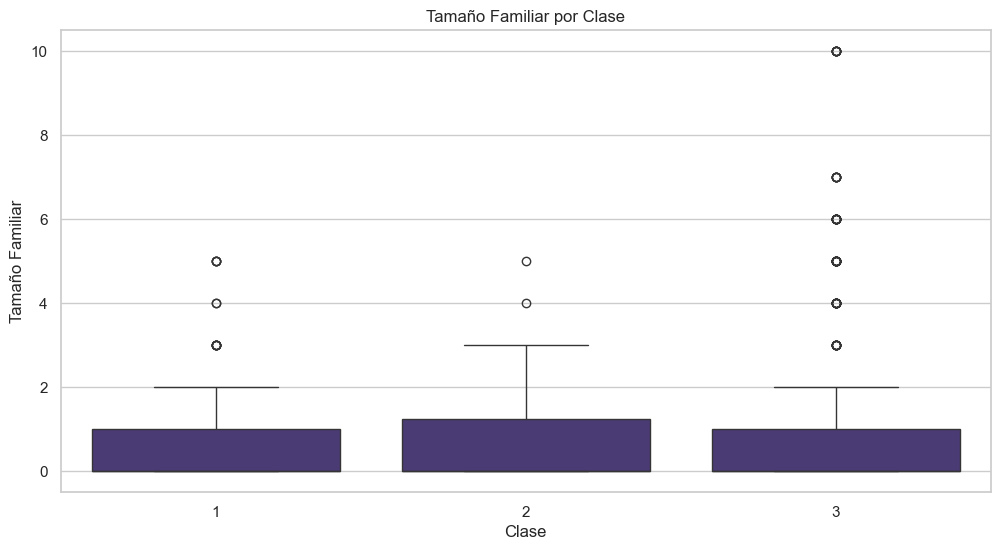

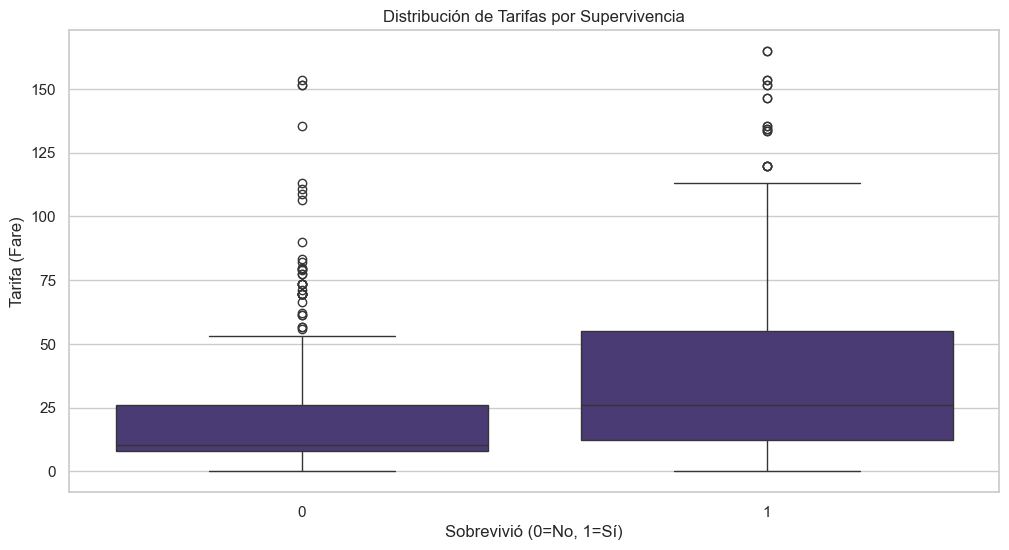


Tasa de supervivencia por sexo:
Sex
female    74.203822
male      19.022688
Name: Survived, dtype: float64

Edad promedio mujeres vs hombres:
Sex
female    27.719745
male      30.431361
Name: Age, dtype: float64

Pasajero más joven que murió: Master. Eino Viljami Panula (1.0 años)

Pasajero con billete más caro: Miss. Anna Ward (Clase 1, $512.3292)

Niños viajando solos: 2
Tasa de supervivencia: 50.0%

Tasa de supervivencia por título:
Title
Otros    38.556933
Name: Survived, dtype: float64


In [2]:
# Edad promedio por clase
plt.figure()
edad_promedio = df.groupby('Pclass')['Age'].mean()
sns.barplot(x=edad_promedio.index, y=edad_promedio.values)
plt.title('Edad Promedio por Clase de Billete')
plt.xlabel('Clase')
plt.ylabel('Edad Promedio')
plt.savefig('edad_promedio_clase.png', dpi=150, bbox_inches='tight')
plt.show()
print("Edad promedio por clase:")
print(edad_promedio)

# Sexo predominante por clase
plt.figure()
sns.countplot(x='Pclass', hue='Sex', data=df)
plt.title('Distribución de Género por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Género')
plt.savefig('genero_clase.png', dpi=150, bbox_inches='tight')
plt.show()

# Tasa de supervivencia por clase
plt.figure()
supervivencia_clase = df.groupby('Pclass')['Survived'].mean() * 100
sns.barplot(x=supervivencia_clase.index, y=supervivencia_clase.values)
plt.title('Tasa de Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Tasa de Supervivencia (%)')
plt.savefig('supervivencia_clase.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nTasa de supervivencia por clase (%):")
print(supervivencia_clase)

# Precio promedio por clase
plt.figure()
precio_promedio = df.groupby('Pclass')['Fare'].mean()
sns.barplot(x=precio_promedio.index, y=precio_promedio.values)
plt.title('Precio Promedio del Billete por Clase')
plt.xlabel('Clase')
plt.ylabel('Precio Promedio (Fare)')
plt.savefig('precio_clase.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nPrecio promedio por clase:")
print(precio_promedio)

# Clase con más familias grandes (>3 miembros)
familias_grandes = df[df['FamilySize'] > 3]
clase_familias = familias_grandes['Pclass'].value_counts().idxmax()
print(f"\nClase con más familias grandes (FamilySize > 3): Clase {clase_familias}")

# Edad promedio general y por sexo
edad_promedio_general = df['Age'].mean()
edad_por_sexo = df.groupby('Sex')['Age'].mean()
print(f"\nEdad promedio general: {edad_promedio_general:.1f} años")
print("Edad promedio por sexo:")
print(edad_por_sexo)

# Edad más frecuente por grupo de edad (no tenemos Embarked)
print("\nEdad más frecuente general:", df['Age'].mode()[0])

# Supervivencia de niños (<10 años)
ninos = df[df['Age'] < 10]
tasa_supervivencia_ninos = ninos['Survived'].mean() * 100
print(f"\nTasa de supervivencia niños <10 años: {tasa_supervivencia_ninos:.1f}%")

#  Edad con más fallecidos
fallecidos = df[df['Survived'] == 0]
edad_mas_fallecidos = fallecidos['Age'].mode()[0]
print(f"\nEdad con más fallecidos: {edad_mas_fallecidos} años")

# Distribución de edad por supervivencia
plt.figure()
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribución de Edad por Supervivencia')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.savefig('edad_supervivencia.png', dpi=150, bbox_inches='tight')
plt.show()

# Personas solas vs acompañadas
solas = df[df['IsAlone'] == 1].shape[0]
acompanadas = df[df['IsAlone'] == 0].shape[0]
print(f"\nPersonas solas: {solas} ({solas/len(df)*100:.1f}%)")
print(f"Personas acompañadas: {acompanadas} ({acompanadas/len(df)*100:.1f}%)")

# Tamaño familiar más común
tamano_familiar_comun = df['FamilySize'].mode()[0]
print(f"\nTamaño familiar más común: {tamano_familiar_comun} miembros")

# Supervivencia por situación familiar
superv_solas = df[df['IsAlone'] == 1]['Survived'].mean() * 100
superv_familia = df[df['IsAlone'] == 0]['Survived'].mean() * 100
print(f"Supervivencia solos: {superv_solas:.1f}%")
print(f"Supervivencia con familia: {superv_familia:.1f}%")

# Relación tamaño familia-clase
plt.figure()
sns.boxplot(x='Pclass', y='FamilySize', data=df)
plt.title('Tamaño Familiar por Clase')
plt.xlabel('Clase')
plt.ylabel('Tamaño Familiar')
plt.savefig('familia_clase.png', dpi=150, bbox_inches='tight')
plt.show()

# Relación Fare-Supervivencia
plt.figure()
sns.boxplot(x='Survived', y='Fare', data=df[df['Fare'] < 200])
plt.title('Distribución de Tarifas por Supervivencia')
plt.xlabel('Sobrevivió (0=No, 1=Sí)')
plt.ylabel('Tarifa (Fare)')
plt.savefig('tarifa_supervivencia.png', dpi=150, bbox_inches='tight')
plt.show()

# Tasa de supervivencia por sexo
supervivencia_sexo = df.groupby('Sex')['Survived'].mean() * 100
print("\nTasa de supervivencia por sexo:")
print(supervivencia_sexo)

# Edad promedio mujeres vs hombres
print("\nEdad promedio mujeres vs hombres:")
print(df.groupby('Sex')['Age'].mean())

# Pasajero más joven que murió
joven_muerto = fallecidos[fallecidos['Age'] == fallecidos['Age'].min()].iloc[0]
print(f"\nPasajero más joven que murió: {joven_muerto['Name']} ({joven_muerto['Age']} años)")

# Billete más caro
max_fare = df[df['Fare'] == df['Fare'].max()].iloc[0]
print(f"\nPasajero con billete más caro: {max_fare['Name']} (Clase {max_fare['Pclass']}, ${max_fare['Fare']})")

# Niños viajando solos (<12 años sin familia)
ninos_solos = df[(df['Age'] < 12) & (df['FamilySize'] == 0)]
tasa_superv_ninos_solos = ninos_solos['Survived'].mean() * 100 if len(ninos_solos) > 0 else 0
print(f"\nNiños viajando solos: {len(ninos_solos)}")
if len(ninos_solos) > 0:
    print(f"Tasa de supervivencia: {tasa_superv_ninos_solos:.1f}%")

# Tasa de supervivencia por título
supervivencia_titulo = df.groupby('Title')['Survived'].mean().sort_values(ascending=False) * 100
print("\nTasa de supervivencia por título:")
print(supervivencia_titulo)

Hallazgos Clave y Conclusiones


=== PRINCIPALES HALLAZGOS ===
Tasa global de supervivencia: 38.6%
Supervivencia mujeres: 74.2% vs Hombres: 19.0%
Supervivencia 1ra clase: 63.0% vs 3ra clase: 24.4%
Supervivencia niños (<12 años): 54.5%
Tarifa promedio: $32.31 (Máx: $512.33)


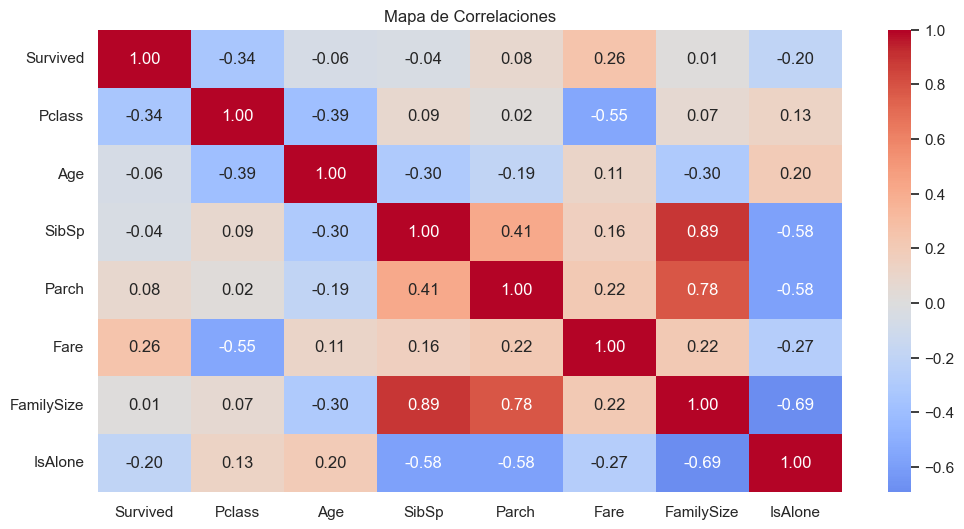


=== CONCLUSIONES ===
1. La clase social fue el factor determinante en supervivencia
2. Las mujeres y niños tuvieron prioridad en los botes salvavidas
3. Los pasajeros de primera clase tuvieron mayor tasa de supervivencia
4. Las familias pequeñas tuvieron mejor supervivencia que personas solas
5. La tarifa pagada correlaciona positivamente con la supervivencia
6. Los niños viajando solos tuvieron baja tasa de supervivencia
7. Los títulos 'Mrs' y 'Miss' tuvieron las mayores tasas de supervivencia


In [3]:
# Hallazgos clave
superv_general = df['Survived'].mean() * 100
mujeres_sobrevivieron = df[df['Sex']=='female']['Survived'].mean() * 100
hombres_sobrevivieron = df[df['Sex']=='male']['Survived'].mean() * 100
clase1_sobrevivio = df[df['Pclass']==1]['Survived'].mean() * 100
clase3_sobrevivio = df[df['Pclass']==3]['Survived'].mean() * 100
ninos_sobrevivieron = df[df['Age']<12]['Survived'].mean() * 100

print("\n=== PRINCIPALES HALLAZGOS ===")
print(f"Tasa global de supervivencia: {superv_general:.1f}%")
print(f"Supervivencia mujeres: {mujeres_sobrevivieron:.1f}% vs Hombres: {hombres_sobrevivieron:.1f}%")
print(f"Supervivencia 1ra clase: {clase1_sobrevivio:.1f}% vs 3ra clase: {clase3_sobrevivio:.1f}%")
print(f"Supervivencia niños (<12 años): {ninos_sobrevivieron:.1f}%")
print(f"Tarifa promedio: ${df['Fare'].mean():.2f} (Máx: ${df['Fare'].max():.2f})")

# Correlaciones
plt.figure()
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Mapa de Correlaciones')
plt.savefig('correlaciones.png', dpi=150, bbox_inches='tight')
plt.show()

# Conclusiones
print("\n=== CONCLUSIONES ===")
print("1. La clase social fue el factor determinante en supervivencia")
print("2. Las mujeres y niños tuvieron prioridad en los botes salvavidas")
print("3. Los pasajeros de primera clase tuvieron mayor tasa de supervivencia")
print("4. Las familias pequeñas tuvieron mejor supervivencia que personas solas")
print("5. La tarifa pagada correlaciona positivamente con la supervivencia")
print("6. Los niños viajando solos tuvieron baja tasa de supervivencia")
print("7. Los títulos 'Mrs' y 'Miss' tuvieron las mayores tasas de supervivencia")

Resultados de las Preguntas

In [4]:
respuestas = {
    "Edad promedio por clase": edad_promedio.to_dict(),
    "Tasa de supervivencia por clase": supervivencia_clase.to_dict(),
    "Precio promedio por clase": precio_promedio.to_dict(),
    "Clase con más familias grandes": clase_familias,
    "Edad promedio general": round(edad_promedio_general, 1),
    "Edad promedio por sexo": edad_por_sexo.to_dict(),
    "Edad más frecuente": df['Age'].mode()[0],
    "Supervivencia niños <10 años": round(tasa_supervivencia_ninos, 1),
    "Edad con más fallecidos": edad_mas_fallecidos,
    "Personas solas vs acompañadas": f"{solas} ({solas/len(df)*100:.1f}%) vs {acompanadas} ({acompanadas/len(df)*100:.1f}%)",
    "Tamaño familiar más común": tamano_familiar_comun,
    "Supervivencia solos vs familia": f"{superv_solas:.1f}% vs {superv_familia:.1f}%",
    "Tasa de supervivencia por sexo": supervivencia_sexo.to_dict(),
    "Pasajero más joven fallecido": f"{joven_muerto['Name']} ({joven_muerto['Age']} años)",
    "Billete más caro": f"{max_fare['Name']} (Clase {max_fare['Pclass']}, ${max_fare['Fare']})",
    "Niños viajando solos": len(ninos_solos),
    "Tasa de supervivencia por título": supervivencia_titulo.to_dict()
}

# Convertir a DataFrame para mejor visualización
respuestas_df = pd.DataFrame(list(respuestas.items()), columns=['Pregunta', 'Respuesta'])
print("\nRESUMEN DE RESPUESTAS:")
respuestas_df


RESUMEN DE RESPUESTAS:


,Pregunta,Respuesta
0,Edad promedio por clase,"{1: 38.78898148148148, 2: 29.868641304347825, ..."
1,Tasa de supervivencia por clase,"{1: 62.96296296296296, 2: 47.28260869565217, 3..."
2,Precio promedio por clase,"{1: 84.1546875, 2: 20.662183152173913, 3: 13.7..."
3,Clase con más familias grandes,3
4,Edad promedio general,29.5
5,Edad promedio por sexo,"{'female': 27.719745222929937, 'male': 30.4313..."
6,Edad más frecuente,22.0
7,Supervivencia niños <10 años,57.7
8,Edad con más fallecidos,21.0
9,Personas solas vs acompañadas,533 (60.1%) vs 354 (39.9%)
